In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df=pd.read_csv('donnees_grossesse.csv')
df

,age,mois_grossesse,poids_kg,taille_cm,activité,régime,antécédents,symptôme,profil_risque
0,23,8,110,156,modérée,omnivore,diabète,douleur,élevé
1,27,9,78,164,élevée,omnivore,autre,nausée,normal
2,21,9,76,147,modérée,végétarien,autre,aucun,modéré
3,42,2,92,169,élevée,végétalien,autre,douleur,élevé
4,31,3,93,148,modérée,végétalien,aucun,fatigue,modéré
...,...,...,...,...,...,...,...,...,...
49995,25,3,78,154,élevée,végétalien,diabète,nausée,modéré
49996,29,7,52,170,modérée,végétalien,aucun,aucun,modéré
49997,22,3,54,166,faible,omnivore,aucun,aucun,normal
49998,39,7,82,173,faible,omnivore,diabète,nausée,élevé


In [9]:
df['profil_risque'].value_counts()

profil_risque
élevé     22795
modéré    16366
normal    10839
Name: count, dtype: int64

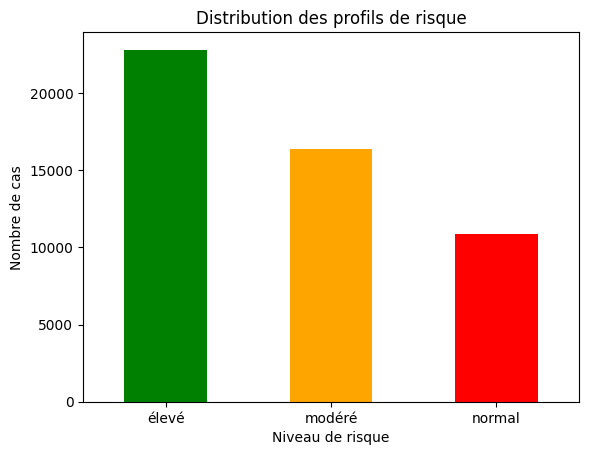

In [10]:
# Afficher la distribution des profils de risque
df['profil_risque'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribution des profils de risque")
plt.xlabel("Niveau de risque")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=0)
plt.show()

In [11]:
df= df.drop_duplicates() # je supprime les doublons ici
print(df.isnull().sum()) #je verifie si y'a des valeurs manquants

age               0
mois_grossesse    0
poids_kg          0
taille_cm         0
activité          0
régime            0
antécédents       0
symptôme          0
profil_risque     0
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Définir les données d'entrée (X) et la sortie (y)
X = df.drop(columns=['profil_risque'])  # Toutes les colonnes sauf la cible
y = df['profil_risque']  # La colonne cible

# Encodage des colonnes catégorielles
label_encoders = {}
colonnes_categorielles = X.select_dtypes(include=['object']).columns  # Colonnes non numériques

for col in colonnes_categorielles:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle
model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    class_weight='balanced', 
    random_state=42
)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9125737721316395

Classification Report:
              precision    recall  f1-score   support

      modéré       0.86      0.87      0.87      3254
      normal       0.86      0.98      0.92      2194
       élevé       0.98      0.91      0.95      4549

    accuracy                           0.91      9997
   macro avg       0.90      0.92      0.91      9997
weighted avg       0.92      0.91      0.91      9997



In [13]:
label_encoders = {}
colonnes_categorielles = ['activité', 'régime', 'antécédents', 'symptôme']

for col in colonnes_categorielles:
    le=LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col]=le
# Afficher les valeurs encodées
for col in colonnes_categorielles:
    print(f"Valeurs encodées pour {col}:")
    print(X[col].unique())
    print()

Valeurs encodées pour activité:
[1 2 0]

Valeurs encodées pour régime:
[0 2 1]

Valeurs encodées pour antécédents:
[3 2 1 0 4]

Valeurs encodées pour symptôme:
[1 3 0 2]



In [14]:
import joblib
joblib.dump(model, 'model_risque_grossesse.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']